<a href="https://colab.research.google.com/github/AHartNtkn/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/DS7_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
t = np.arange(-2.0, 2.0, 0.01)
s = t**2

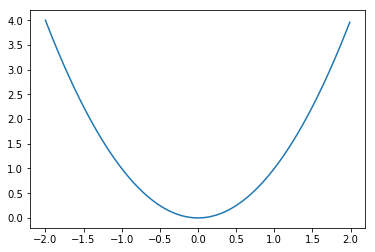

In [8]:
plt.plot(t, s)
plt.show()

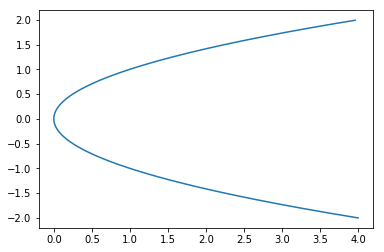

In [9]:
plt.plot(s, t)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Well, firstly because the graph of a function is not the same thing as a function itself, so no graph is actually a function. Outside of that, the second graph doesn't graph a function because it maps to multple outputs from a single input.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

If you're defining functions as mappings from inputs to outputs, then NONE of those relations are functions since they aren't mappings; they're sets of ordered-pairs. However, relation 2 can be coerced into a function since each pair's first member is unique among the relation's pairs. (Incidendly, relations 3, 4, and 5 can also be coerced into functions by taking the second of its pairs as the input).

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

$m : \mathbb{R}^3 \to \mathbb{R}^3$

$n : \mathbb{R}^4 \to \mathbb{R}^2$

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes:

$\text{spiral}(\theta) = (e^{ \theta } \text{sin}(\theta), e^{ \theta } \text{cos}(\theta))$

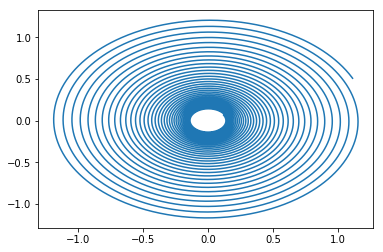

In [26]:
t = np.arange(-200.0, 20.0, 0.01)
tightness = .01
xs = np.e**(tightness*t) * np.sin(t)
ys = np.e**(tightness*t) * np.cos(t)

plt.plot(xs, ys)
plt.show()

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [32]:
def p(x):
  return np.array([x[0] + 3 *x[1],
          2 * x[1] - x[0]])

def q(x):
  return np.array([4 * x[0] + 1 * x[1] + 2 * x[2],
          -1 * x[0] + 2 * x[1] + 3 * x[2],
          5 * x[0] + 1 * x[1] - 2 * x[2]])

print(p(np.array([[1],[0]])))
print(p(np.array([[0],[1]])))

print(q(np.array([[1],[0],[0]])))
print(q(np.array([[0],[1],[0]])))
print(q(np.array([[0],[0],[1]])))

[[ 1]
 [-1]]
[[3]
 [2]]
[[ 4]
 [-1]
 [ 5]]
[[1]
 [2]
 [1]]
[[ 2]
 [ 3]
 [-2]]


In [37]:
ptran = np.array([ p(np.array([[1],[0]])).T[0], p(np.array([[0],[1]])).T[0] ]).T
qtran = np.array([ q(np.array([[1],[0],[0]])).T[0], q(np.array([[0],[1],[0]])).T[0], q(np.array([[0],[0],[1]])).T[0] ]).T

print(ptran, '\n')
print(qtran)

[[ 1  3]
 [-1  2]] 

[[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


In [41]:
print(np.matmul(ptran, [[1],[0]]))
print(np.matmul(ptran, [[0],[1]]))

print(np.matmul(qtran, [[1],[0],[0]]))
print(np.matmul(qtran, [[0],[1],[0]]))
print(np.matmul(qtran, [[0],[0],[1]]))

[[ 1]
 [-1]]
[[3]
 [2]]
[[ 4]
 [-1]
 [ 5]]
[[1]
 [2]
 [1]]
[[ 2]
 [ 3]
 [-2]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [43]:
print(np.matmul(ptran, [[2],[-3]]))
print(p(np.array([[2],[-3]])))

print(np.matmul(qtran, [[4],[-5],[7]]))
print(q(np.array([[4],[-5],[7]])))

[[-7]
 [-8]]
[[-7]
 [-8]]
[[25]
 [ 7]
 [ 1]]
[[25]
 [ 7]
 [ 1]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Given some linear transformation, an eigenvector is a vector which is at most scaled by the transformation. The coeficient of this scaling is the eigenvalue. Fiven a transformation $T$, $\lambda$ is an eigenvalue of the eigenvector $v$ of $T$ if and only if $Tv = \lambda v$.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

*   Data becomes hard to visualize as you can't plot as many spacial dimensions as you have.
*   Euclidean distance measures become less useful.



## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

One should have at least five times more observations as parameters.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [107]:
import pandas as pd
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

In [109]:
X = array([iris['sepal_length'], iris['sepal_width'], iris['petal_length'], iris['petal_width']]).T
print("Data: ", X)

Data:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9

In [110]:
means = mean(X.T, axis=1)
print("\n Means: \n", means)


 Means: 
 [5.84333333 3.054      3.75866667 1.19866667]


In [111]:
centered_data = X - means
print("\n Centered Data: \n", centered_data)


 Centered Data: 
 [[-7.43333333e-01  4.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01 -5.40000000e-02 -2.35866667e+00 -9.98666667e-01]
 [-1.14333333e+00  1.46000000e-01 -2.45866667e+00 -9.98666667e-01]
 [-1.24333333e+00  4.60000000e-02 -2.25866667e+00 -9.98666667e-01]
 [-8.43333333e-01  5.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-4.43333333e-01  8.46000000e-01 -2.05866667e+00 -7.98666667e-01]
 [-1.24333333e+00  3.46000000e-01 -2.35866667e+00 -8.98666667e-01]
 [-8.43333333e-01  3.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.44333333e+00 -1.54000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01  4.60000000e-02 -2.25866667e+00 -1.09866667e+00]
 [-4.43333333e-01  6.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.04333333e+00  3.46000000e-01 -2.15866667e+00 -9.98666667e-01]
 [-1.04333333e+00 -5.40000000e-02 -2.35866667e+00 -1.09866667e+00]
 [-1.54333333e+00 -5.40000000e-02 -2.65866667e+00 -1.09866667e+00]
 [-4.33333333e-02  9.46000000e-01 -2.558666

In [112]:
std_devs = std(X.T, axis=1)
standardized_data = centered_data/std_devs
print("\n Standardized Data: \n", standardized_data)


 Standardized Data: 
 [[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45

In [113]:
cov(X.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [114]:
covariance_matrix = cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)


 Covariance Matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [115]:
pd.DataFrame(standardized_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']).cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.110103,0.877605,0.823443
sepal_width,-0.110103,1.006711,-0.423338,-0.358937
petal_length,0.877605,-0.423338,1.006711,0.969219
petal_width,0.823443,-0.358937,0.969219,1.006711


In [116]:
np.matmul(standardized_data.T, standardized_data)

array([[150.        , -16.40538749, 130.7631236 , 122.69304501],
       [-16.40538749, 150.        , -63.07741446, -53.48161344],
       [130.7631236 , -63.07741446, 150.        , 144.41356456],
       [122.69304501, -53.48161344, 144.41356456, 150.        ]])

In [117]:
vals, vects = eig(covariance_matrix)
print("\n Eigenvectors: \n", vects)
print("\n Eigenvalues: \n", vals)


 Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

 Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601]


In [118]:
P = np.dot(vects.T, standardized_data.T)
print("\n Projected Data: \n", P.T)


 Projected Data: 
 [[-2.26454173e+00 -5.05703903e-01 -1.21943348e-01  2.30733235e-02]
 [-2.08642550e+00  6.55404729e-01 -2.27250832e-01  1.03208244e-01]
 [-2.36795045e+00  3.18477311e-01  5.14796236e-02  2.78252250e-02]
 [-2.30419716e+00  5.75367713e-01  9.88604444e-02 -6.63114622e-02]
 [-2.38877749e+00 -6.74767397e-01  2.14278490e-02 -3.73972870e-02]
 [-2.07053681e+00 -1.51854856e+00  3.06842583e-02  4.39877494e-03]
 [-2.44571134e+00 -7.45626750e-02  3.42197636e-01 -3.80965668e-02]
 [-2.23384186e+00 -2.47613932e-01 -8.25744645e-02 -2.55051623e-02]
 [-2.34195768e+00  1.09514636e+00  1.53562399e-01 -2.67938291e-02]
 [-2.18867576e+00  4.48629048e-01 -2.46559522e-01 -3.99073035e-02]
 [-2.16348656e+00 -1.07059558e+00 -2.64009373e-01  1.53011377e-02]
 [-2.32737775e+00 -1.58587455e-01  1.00165616e-01 -1.34554258e-01]
 [-2.22408272e+00  7.09118158e-01 -2.23214514e-01  2.63061382e-03]
 [-2.63971626e+00  9.38281982e-01  1.89570030e-01 -1.94220183e-02]
 [-2.19229151e+00 -1.88997851e+00 -4.69480

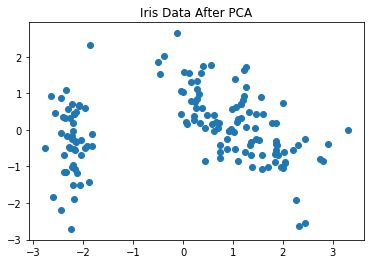

In [119]:
data = {"x": P[0], "y": P[1]}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.title("Iris Data After PCA")
plt.show()

In [0]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [128]:
Z = StandardScaler().fit_transform(X)
print("\n Standardized Data: \n", Z)


 Standardized Data: 
 [[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45

In [129]:
pca = PCA(2)
pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n", pca.explained_variance_)


 Eigenvectors: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

 Eigenvalues: 
 [2.93035378 0.92740362]


That second vector was negative in the previous analysis.

In [131]:
B = pca.transform(Z)

print("\n Projected Data: \n", B)


 Projected Data: 
 [[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.22821750e+00  1.62186163e-01]
 [-1.95702401e+00 -6.07892567e-01]
 [-2.05206331e+00  2.66014312e-01]
 [-2.16819365e+00  5.52016495e-01]


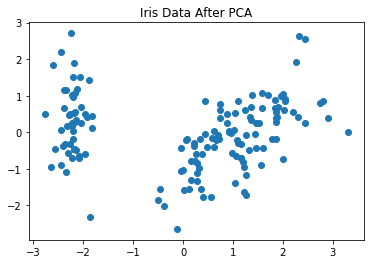

In [134]:
# It's upside-down, for some reason.
data = {"x": B.T[0], "y": B.T[1]}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.title("Iris Data After PCA")
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)